# readme
descrip: plot mean SSH in the North Atlantic for Sunway LR (historic and future), HR (historic and future) and Altimeter (historic)

update history: <br>
v1.0 DL 2021Apr12 <br>
v1.1 DL 2021Apr23 <br>

extra notes: <br>
you should compare observation with transient runs not with transient minus control, see appendix

# import modules

In [1]:
# general python packages
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
%matplotlib inline
import proplot as plot
import cartopy
cartopy.config['pre_existing_data_dir']='/scratch/group/ihesp/shared/cartopy_features'
# from cartopy.mpl.geoaxes import GeoAxes
# from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
# from mpl_toolkits.axes_grid1 import AxesGrid

# python GCM(POP) packages
# import xgcm
# import pop_tools
import xesmf as xe

# from eofs.xarray import Eof

# dask jupyter lab packages
# from dask.distributed import Client
# from dask.distributed import performance_report

# file name with time packages
# from itertools import product
# from cftime import DatetimeNoLeap

# load data

In [2]:
# North Atlantic
lat1, lat2 = 20, 65 
lon1, lon2 = -90, 0 # 90W - 0W 

In [3]:
infile_obs = ('/scratch/user/dapengli/Projects4iHESP/Project_SeaLevelUSEastCoast_2021Mar30/'
              'raw_data/zos_AVISO_L4_199210-201012.nc.nc4')
ds_obs = xr.open_dataset(infile_obs)
ds_obs

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 180, lon: 360, time: 219)
Coordinates:
  * time       (time) datetime64[ns] 1992-10-16T12:00:00 ... 2010-12-16T12:00:00
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    zos        (time, lat, lon) float32 ...
Attributes: (12/29)
    institution:                     Centre National d'Etudes Spatiales
    institute_id:                    CNES
    experiment_id:                   obs
    source:                          SSALTO/DUACS
    model_id:                        Obs-AVISO
    contact:                         AVISO User Service, aviso@oceanobs.com
    ...                              ...
    project_id:                      obs4MIPs
    table_id:                        Table Omon_obs (31 January 2011) 3852a2b...
    title:                           Obs-AVISO model output prepared for obs4...
    modeling_realm:                  ocean
    cmor_version:                    2.5.3
    DODS_EXTRA.Unlimited_Dimension:  time

In [4]:
weights_obs = np.cos(np.deg2rad(ds_obs.lat))
weights_obs.name = "weights_obs"
ssh_gl_av_obs = ds_obs.zos.weighted(weights_obs).mean(("lon", "lat")) # unit: m
ssh_gl_av_obs

<xarray.DataArray 'zos' (time: 219)>
array([0.51586877, 0.49270135, 0.45900224, 0.4453843 , 0.44330857,
       0.44285649, 0.44689792, 0.45415097, 0.46512328, 0.4765817 ,
       0.48982279, 0.49843559, 0.49937681, 0.48525292, 0.46483025,
       0.47460629, 0.46923653, 0.46943504, 0.45597434, 0.45995515,
       0.46790311, 0.48172345, 0.49274059, 0.49621509, 0.50075323,
       0.48372564, 0.46390109, 0.45477786, 0.45171714, 0.44915707,
       0.44836547, 0.4573833 , 0.46986221, 0.47786585, 0.48758237,
       0.49808022, 0.50019586, 0.49052566, 0.46605156, 0.4529325 ,
       0.4503488 , 0.44872631, 0.45274284, 0.46611566, 0.47723771,
       0.48831414, 0.49483311, 0.50322933, 0.50830168, 0.49080744,
       0.4596845 , 0.45220573, 0.45099354, 0.4497439 , 0.45252644,
       0.46297044, 0.47904355, 0.48868734, 0.50147208, 0.50777558,
       0.51207219, 0.49709426, 0.46760503, 0.46041311, 0.45913033,
       0.45964693, 0.46272805, 0.47013825, 0.4805738 , 0.49207567,
       0.50411129, 0.5133075 , 0.51548668, 0.49904081, 0.47649474,
       0.46443412, 0.46055426, 0.45993665, 0.46266866, 0.47032609,
       0.48039697, 0.49295983, 0.50494929, 0.51440602, 0.51550427,
       0.50255085, 0.48001771, 0.4686961 , 0.46623312, 0.46391034,
       0.4617609 , 0.47437552, 0.48609198, 0.49433008, 0.50589147,
       0.51750011, 0.51950109, 0.50486244, 0.47617694, 0.47069839,
...
       0.52280543, 0.50969711, 0.4869084 , 0.48031756, 0.47629434,
       0.47572483, 0.47715309, 0.48649448, 0.49852511, 0.50712351,
       0.51735386, 0.52805354, 0.5296267 , 0.51650883, 0.48843231,
       0.48016487, 0.47527745, 0.47852168, 0.47907185, 0.48611631,
       0.49886252, 0.5112612 , 0.52354116, 0.53144512, 0.53084582,
       0.5116629 , 0.49154061, 0.4833367 , 0.48050578, 0.47792382,
       0.47865504, 0.48744036, 0.497695  , 0.5113046 , 0.52411996,
       0.53302443, 0.53846974, 0.51961506, 0.49388273, 0.48513148,
       0.48312289, 0.47834956, 0.47894254, 0.48701082, 0.50050344,
       0.51477444, 0.52814776, 0.53954571, 0.54140817, 0.52468133,
       0.4923849 , 0.48584603, 0.482048  , 0.48186584, 0.48595337,
       0.49124234, 0.50012055, 0.51313138, 0.5243553 , 0.53568268,
       0.53571601, 0.527316  , 0.50710588, 0.4902802 , 0.48769009,
       0.48660396, 0.49391209, 0.50379936, 0.5153916 , 0.52134963,
       0.53004021, 0.53811018, 0.54328149, 0.53222149, 0.50806195,
       0.49526042, 0.4904164 , 0.49181798, 0.49488417, 0.50302787,
       0.51123187, 0.52407987, 0.53827359, 0.55212996, 0.55059148,
       0.53887161, 0.51347886, 0.49892312, 0.49682508, 0.49745416,
       0.49726036, 0.50518961, 0.52256081, 0.53720268, 0.54502578,
       0.54904787, 0.54670636, 0.52672867, 0.50020551])
Coordinates:
  * time     (time) datetime64[ns] 1992-10-16T12:00:00 ... 2010-12-16T12:00:00

In [5]:
ds_obs.zos.sel(time=slice('1993','2009')) 

<xarray.DataArray 'zos' (time: 204, lat: 180, lon: 360)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       ...,

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1993-01-16T12:00:00 ... 2009-12-16T12:00:00
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
Attributes:
    standard_name:     sea_surface_height_above_geoid
    long_name:         Sea Surface Height Above Geoid
    units:             m
    original_name:     maps_of_absolute_dynamic_topography
    history:           2011-02-11, 12:02:38, AVISO, Aviso2Cmor 2009-01-01 200...
    original_units:    cm
    cell_methods:      time: mean
    cell_measures:     area: areacello
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...

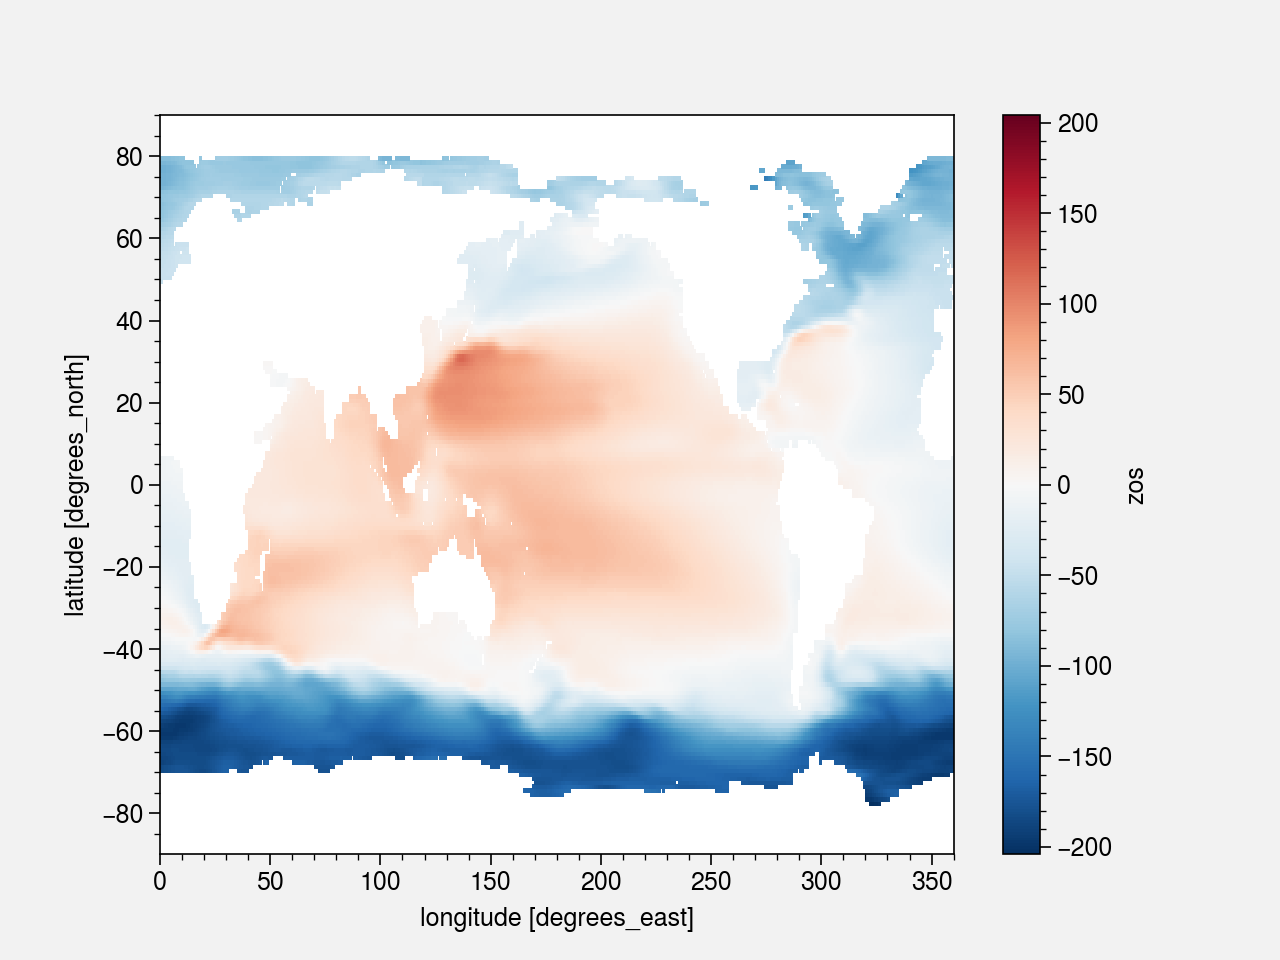

In [6]:
ssh1_obs = (ds_obs.zos-ssh_gl_av_obs).sel(time=slice('1993','2009')).mean('time')*100
ssh1_obs.plot()

In [7]:
indir = ('/scratch/user/dapengli/Projects4iHESP/Project_SeaLevelUSEastCoast_2021Mar30/'
         'data_after_manipulation/SSH/')

infile1_TH = indir + 'B.E.13.BTRANS.ne120_t12.sehires38.003.sunway.pop.h.SSH.1850-2100_2021Apr05.nc'
ds_TH = xr.open_dataset(infile1_TH)
ds_TH

<xarray.Dataset>
Dimensions:     (d2: 2, nlat: 2400, nlon: 3600, time: 251)
Coordinates:
  * time        (time) object 1850-07-16 21:59:59.999997 ... 2100-07-02 05:00...
    TLONG       (nlat, nlon) float64 ...
    TLAT        (nlat, nlon) float64 ...
Dimensions without coordinates: d2, nlat, nlon
Data variables:
    time_bound  (time, d2) object ...
    SSH         (time, nlat, nlon) float32 ...
Attributes: (12/13)
    title:           B.E.13.BHISTC5.ne120_t12.sehires38.003.sunway
    Conventions:     CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curr...
    contents:        Diagnostic and Prognostic Variables
    source:          CCSM POP2, the CCSM Ocean Component
    revision:        $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    calendar:        All years have exactly  365 days.
    ...              ...
    cell_methods:    cell_methods = time: mean ==> the variable values are av...
    nsteps_total:    19331
    tavg_sum:        2676600.0
    tavg_sum_qflux:  2676600.0
    NCO:             netCDF Operators version 4.9.7 (Homepage = http://nco.sf...
    history:         Mon Apr  5 16:59:37 2021: ncra --mro -d time,,,12,12 B.E...

In [8]:
infile1_TL = indir + 'B.E.13.BTRANS.ne30g16.sehires38.003.sunway.pop.h.SSH.1850-2100_2021Apr05.nc'
ds_TL = xr.open_dataset(infile1_TL)
ds_TL

<xarray.Dataset>
Dimensions:     (d2: 2, nlat: 384, nlon: 320, time: 251)
Coordinates:
  * time        (time) object 1850-07-02 06:00:00 ... 2100-07-02 05:00:00.000003
    TLONG       (nlat, nlon) float64 ...
    TLAT        (nlat, nlon) float64 ...
Dimensions without coordinates: d2, nlat, nlon
Data variables:
    time_bound  (time, d2) object ...
    SSH         (time, nlat, nlon) float32 ...
Attributes: (12/13)
    title:           B.E.13.BHISTC5.ne30g16.sehires38.003.sunway
    history:         Mon Apr  5 17:12:55 2021: ncra --mro -d time,,,12,12 B.E...
    Conventions:     CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curr...
    contents:        Diagnostic and Prognostic Variables
    source:          CCSM POP2, the CCSM Ocean Component
    revision:        $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    ...              ...
    start_time:      This dataset was created on 2020-04-11 at 22:12:21.5
    cell_methods:    cell_methods = time: mean ==> the variable values are av...
    nsteps_total:    25
    tavg_sum:        86400.0
    tavg_sum_qflux:  86400.0
    NCO:             netCDF Operators version 4.9.7 (Homepage = http://nco.sf...

In [9]:
infile0_t12 = ('/scratch/group/ihesp/user/dapengli/Projects4iHESP/SupplementaryFiles4POP/'
'POPgrids_tx0.1v2_2020Jun29.nc') # POP t12 grid file
ds0_t12 = xr.open_dataset(infile0_t12)
ds0_t12

<xarray.Dataset>
Dimensions:      (nlat: 2400, nlon: 3600, z_t: 62, z_w: 62, z_w_bot: 62)
Coordinates:
    TLAT         (nlat, nlon) float64 ...
    TLONG        (nlat, nlon) float64 ...
  * z_t          (z_t) float64 500.0 1.5e+03 2.5e+03 ... 5.625e+05 5.875e+05
  * z_w          (z_w) float64 0.0 1e+03 2e+03 ... 5.25e+05 5.5e+05 5.75e+05
  * z_w_bot      (z_w_bot) float64 1e+03 2e+03 3e+03 ... 5.5e+05 5.75e+05 6e+05
Dimensions without coordinates: nlat, nlon
Data variables:
    ULAT         (nlat, nlon) float64 ...
    ULONG        (nlat, nlon) float64 ...
    DXT          (nlat, nlon) float64 ...
    DYT          (nlat, nlon) float64 ...
    TAREA        (nlat, nlon) float64 ...
    KMT          (nlat, nlon) int32 ...
    REGION_MASK  (nlat, nlon) int32 ...
    dz           (z_t) float64 ...
Attributes:
    lateral_dims:       [2400 3600]
    vertical_dims:      62
    vert_grid_file:     tx0.1v3_vert_grid
    horiz_grid_fname:   inputdata/ocn/pop/tx0.1v2/grid/horiz_grid_200709.ieeer8
    topography_fname:   inputdata/ocn/pop/tx0.1v2/grid/topography_km62_201711...
    region_mask_fname:  inputdata/ocn/pop/tx0.1v2/grid/region_mask_20080702.i...
    type:               tripole
    title:              POP_tx0.1v2 grid

In [10]:
infile0_g16 = ('/scratch/group/ihesp/user/dapengli/Projects4iHESP/SupplementaryFiles4POP/'
'POPgrids_gx1v6_2020Jun29.nc') # POP g16 grid file
ds0_g16 = xr.open_dataset(infile0_g16)
ds0_g16

<xarray.Dataset>
Dimensions:      (nlat: 384, nlon: 320, z_t: 60, z_w: 60, z_w_bot: 60)
Coordinates:
    TLAT         (nlat, nlon) float64 ...
    TLONG        (nlat, nlon) float64 ...
  * z_t          (z_t) float64 500.0 1.5e+03 2.5e+03 ... 5.125e+05 5.375e+05
  * z_w          (z_w) float64 0.0 1e+03 2e+03 3e+03 ... 4.75e+05 5e+05 5.25e+05
  * z_w_bot      (z_w_bot) float64 1e+03 2e+03 3e+03 ... 5e+05 5.25e+05 5.5e+05
Dimensions without coordinates: nlat, nlon
Data variables:
    ULAT         (nlat, nlon) float64 ...
    ULONG        (nlat, nlon) float64 ...
    DXT          (nlat, nlon) float64 ...
    DYT          (nlat, nlon) float64 ...
    TAREA        (nlat, nlon) float64 ...
    KMT          (nlat, nlon) int32 ...
    REGION_MASK  (nlat, nlon) int32 ...
    dz           (z_t) float64 ...
Attributes:
    lateral_dims:         [384 320]
    vertical_dims:        60
    vert_grid_file:       gx1v7_vert_grid
    horiz_grid_fname:     inputdata/ocn/pop/gx1v6/grid/horiz_grid_20010402.ie...
    topography_fname:     inputdata/ocn/pop/gx1v6/grid/topography_20090204.ie...
    region_mask_fname:    inputdata/ocn/pop/gx1v6/grid/region_mask_20090205.i...
    type:                 dipole
    region_mask_regions:  {'Caspian Sea': -14, 'Black Sea': -13, 'Baltic Sea'...
    title:                POP_gx1v6 grid

# data analysis 

In [11]:
ssh_gl_av_TH = ds_TH.SSH.sel(time=slice('1993','2009')).weighted(ds0_t12.TAREA).mean(("nlon", "nlat"))
ssh_gl_av_TH # unit: cm, offset is -0.216 cm

<xarray.DataArray 'SSH' (time: 17)>
array([-0.21559634, -0.21558886, -0.21557792, -0.21557362, -0.21556238,
       -0.21555882, -0.21555089, -0.21553308, -0.21550781, -0.21549408,
       -0.21547392, -0.21545672, -0.21545275, -0.21544445, -0.21544019,
       -0.21543916, -0.21542666])
Coordinates:
  * time     (time) object 1993-07-02 05:00:00.000003 ... 2009-07-02 05:00:00...

In [12]:
ssh_gl_av_TL = ds_TL.SSH.sel(time=slice('1993','2009')).weighted(ds0_g16.TAREA).mean(("nlon", "nlat")) 
ssh_gl_av_TL # unit: cm, offset is -5e-5 cm

<xarray.DataArray 'SSH' (time: 17)>
array([-5.80855021e-05, -5.81944513e-05, -5.83482171e-05, -5.83436072e-05,
       -5.83320834e-05, -5.85948886e-05, -5.88958518e-05, -5.90513870e-05,
       -5.92008421e-05, -5.94182806e-05, -5.94969830e-05, -5.98177001e-05,
       -5.97770075e-05, -5.95613764e-05, -5.93287648e-05, -5.94123091e-05,
       -5.95476181e-05])
Coordinates:
  * time     (time) object 1993-07-02 05:00:00.000003 ... 2009-07-02 05:00:00...

In [13]:
ssh1_TH = ds_TH.SSH.sel(time=slice('1993','2009')).mean('time').where(ds0_t12.KMT>0,np.nan)+0.216
# mask land with nan and subtract offset for HR
ssh2_TH = ds_TH.SSH.sel(time=slice('2084','2100')).mean('time').where(ds0_t12.KMT>0,np.nan)+0.216
ssh_df_TH = ssh2_TH - ssh1_TH

ssh1_TL = ds_TL.SSH.sel(time=slice('1993','2009')).mean('time').where(ds0_g16.KMT>0,np.nan)
# mask land with nan, no need to subtract offset for LR cause it's too small
ssh2_TL = ds_TL.SSH.sel(time=slice('2084','2100')).mean('time').where(ds0_g16.KMT>0,np.nan)
ssh_df_TL = ssh2_TL - ssh1_TL

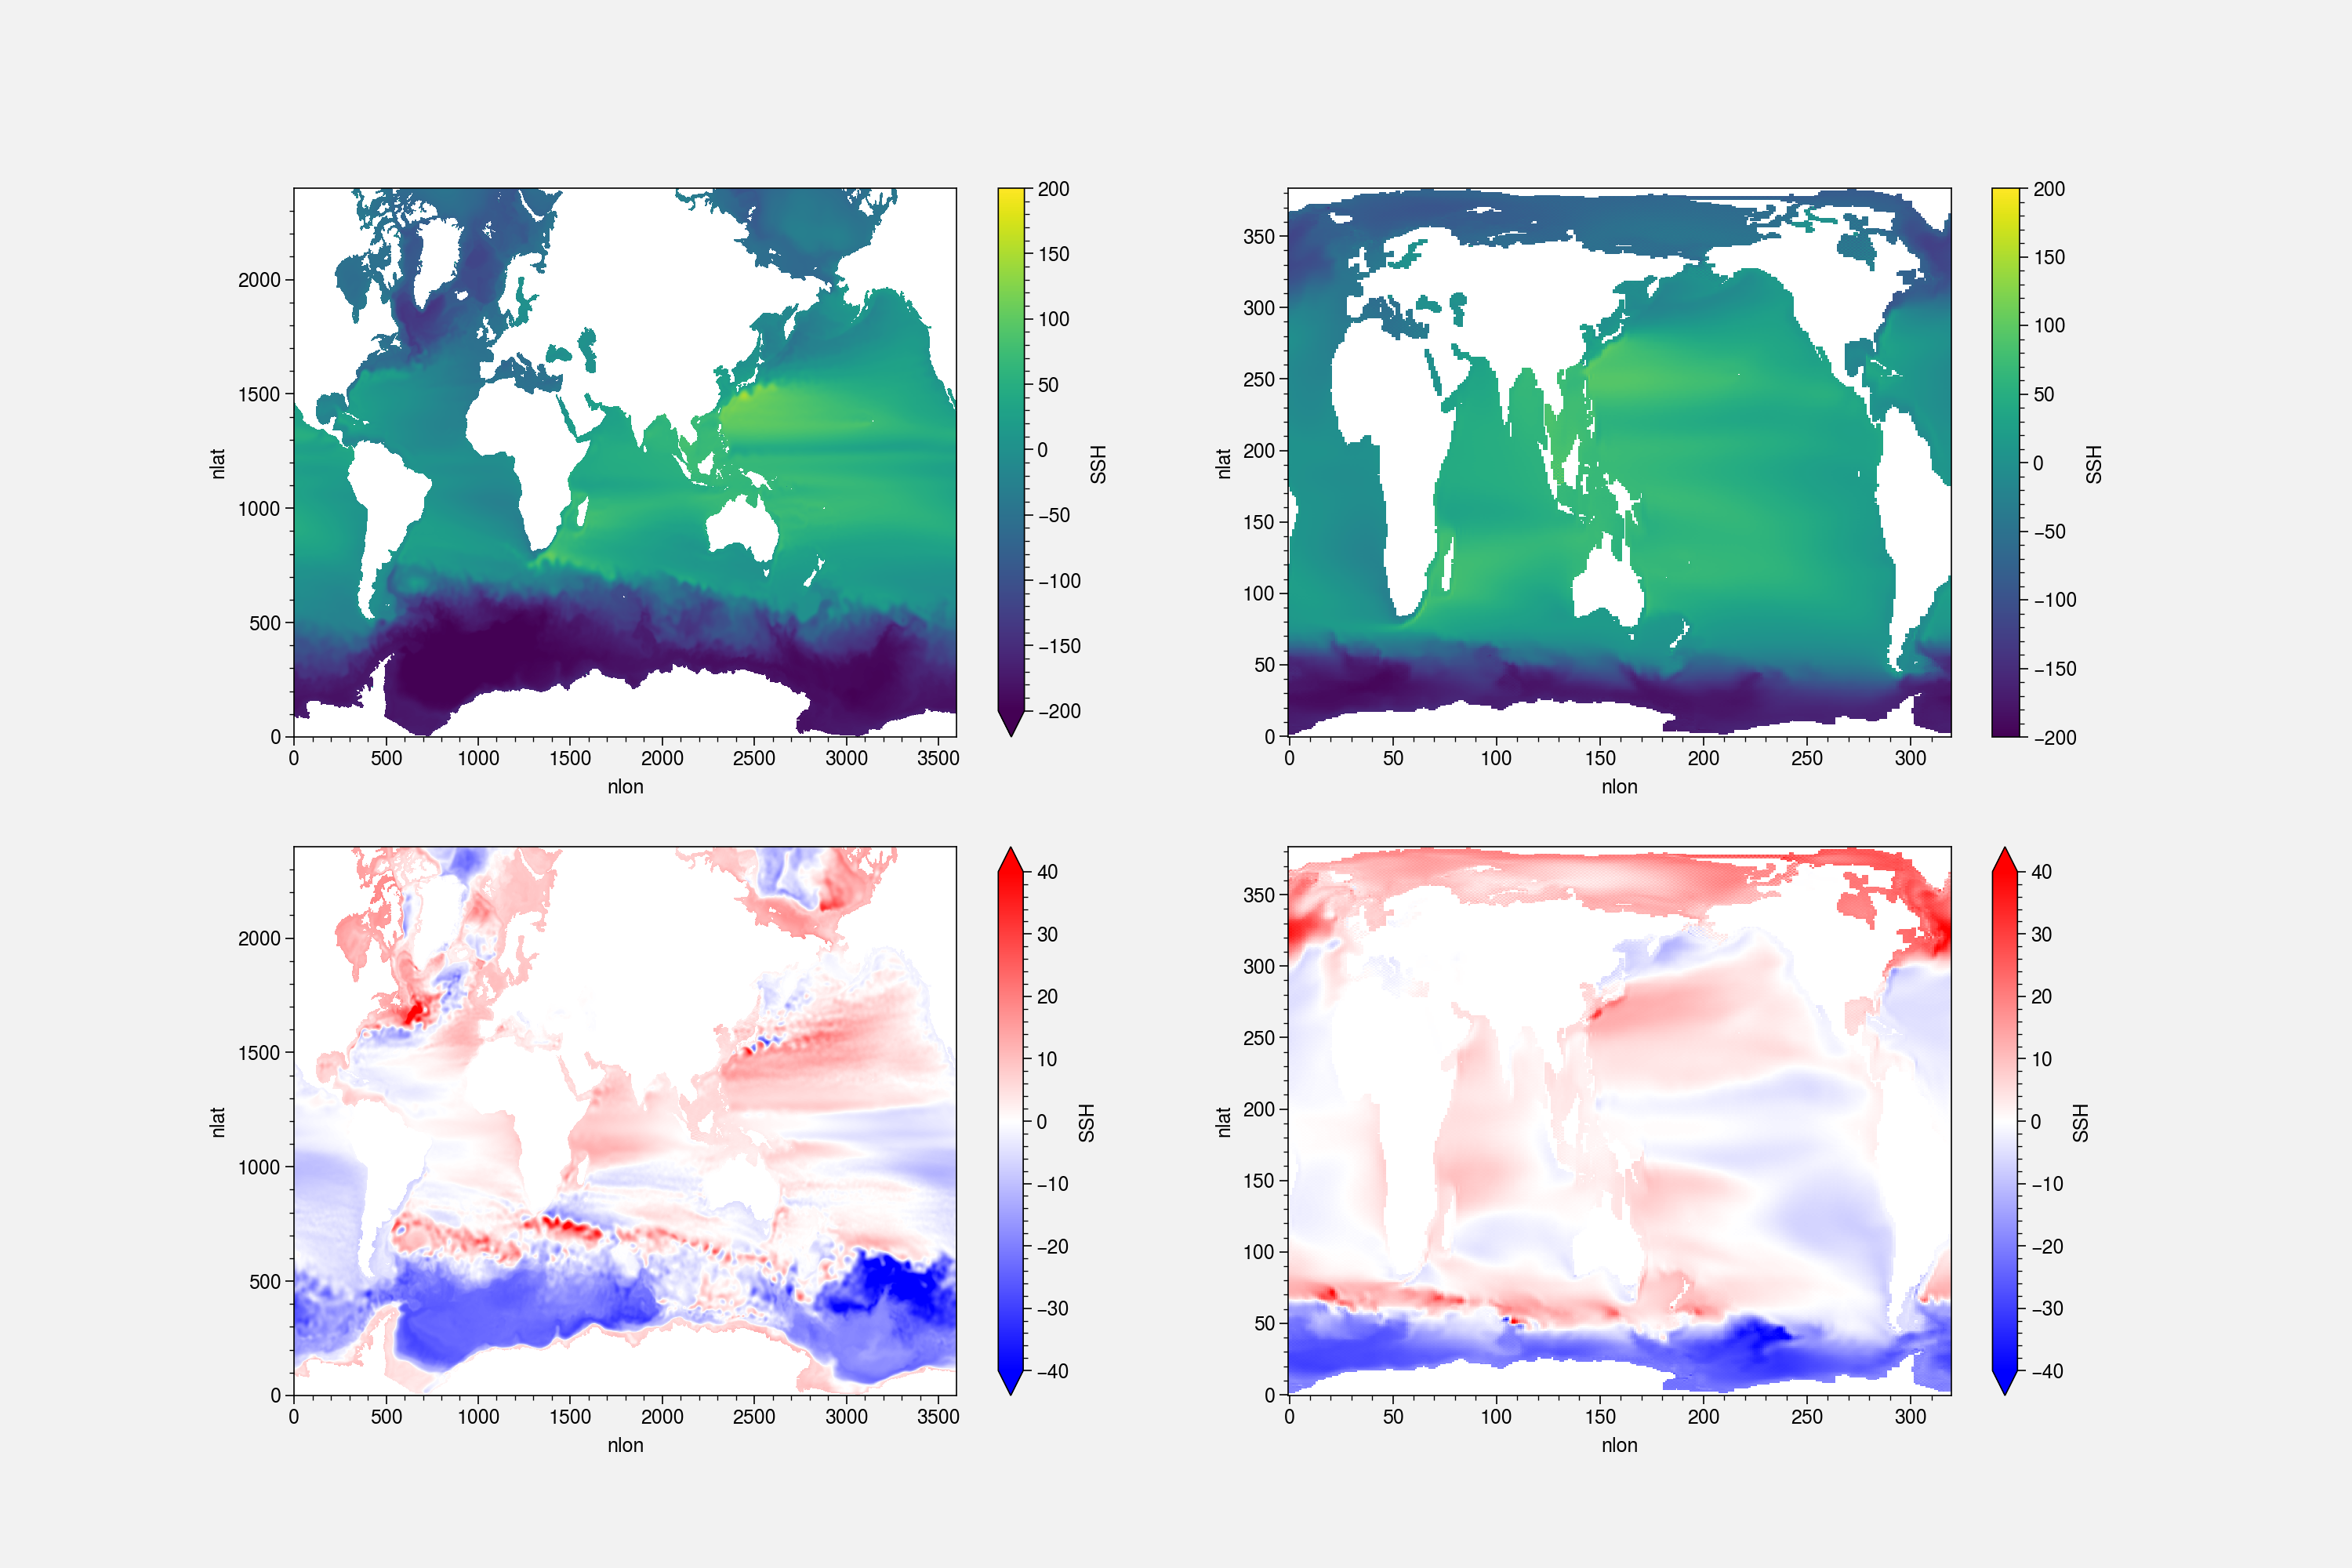

In [14]:
fig, axes = plt.subplots(2,2,figsize=(15,10))
ssh1_TH.plot(ax=axes[0,0],vmin=-200,vmax=200)
ssh1_TL.plot(ax=axes[0,1],vmin=-200,vmax=200)
ssh_df_TH.plot(ax=axes[1,0],vmin=-40,vmax=40,cmap='bwr')
ssh_df_TL.plot(ax=axes[1,1],vmin=-40,vmax=40,cmap='bwr')

regrid t12 to 1deg grids

In [15]:
ds_1deg = xe.util.grid_global(1, 1)
ds_1deg

<xarray.Dataset>
Dimensions:  (x: 360, x_b: 361, y: 180, y_b: 181)
Coordinates:
    lon      (y, x) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
    lat      (y, x) float64 -89.5 -89.5 -89.5 -89.5 ... 89.5 89.5 89.5 89.5
    lon_b    (y_b, x_b) int64 -180 -179 -178 -177 -176 ... 176 177 178 179 180
    lat_b    (y_b, x_b) int64 -90 -90 -90 -90 -90 -90 -90 ... 90 90 90 90 90 90
Dimensions without coordinates: x, x_b, y, y_b
Data variables:
    *empty*

In [16]:
ds0_g16_rn = ds0_g16.rename({'TLONG': 'lon', 'TLAT': 'lat'}) # rn: rename
ds0_t12_rn = ds0_t12.rename({'TLONG': 'lon', 'TLAT': 'lat'})
weightfile_t12_1deg = ('/scratch/group/ihesp/user/dapengli/Projects4iHESP/SupplementaryFiles4POP/'
                      'bilinear_t12_1x1degGlobalRectlinear_periodic_2020Aug01.nc')
regridder_t12_1deg = xe.Regridder(ds0_t12_rn, ds_1deg, method='bilinear', periodic=True,
                        filename=weightfile_t12_1deg, reuse_weights=True) # 
regridder_t12_1deg

xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            /scratch/group/ihesp/user/dapengli/Projects4iHESP/SupplementaryFiles4POP/bilinear_t12_1x1degGlobalRectlinear_periodic_2020Aug01.nc 
Reuse pre-computed weights? True 
Input grid shape:           (2400, 3600) 
Output grid shape:          (180, 360) 
Periodic in longitude?      True

In [17]:
ssh1_rgd_TH = regridder_t12_1deg(ssh1_TH)
ssh_df_rgd_TH = regridder_t12_1deg(ssh_df_TH)

/scratch/group/ihesp/shared/conda/envs/envMar25/lib/python3.7/site-packages/xesmf/frontend.py:476: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


regrid satellite grids to g16 grid

In [18]:
weightfile_g16_1deg = ('/scratch/group/ihesp/user/dapengli/Projects4iHESP/SupplementaryFiles4POP/'
                      'bilinear_g16_1x1degGlobalRectlinear_periodic_2020Aug01.nc')
regridder_g16_1deg = xe.Regridder(ds0_g16_rn, ds_1deg, method='bilinear', periodic=True,
                        filename=weightfile_g16_1deg, reuse_weights=True)
regridder_g16_1deg

xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            /scratch/group/ihesp/user/dapengli/Projects4iHESP/SupplementaryFiles4POP/bilinear_g16_1x1degGlobalRectlinear_periodic_2020Aug01.nc 
Reuse pre-computed weights? True 
Input grid shape:           (384, 320) 
Output grid shape:          (180, 360) 
Periodic in longitude?      True

In [19]:
ssh1_rgd_TL = regridder_g16_1deg(ssh1_TL)
ssh_df_rgd_TL = regridder_g16_1deg(ssh_df_TL)

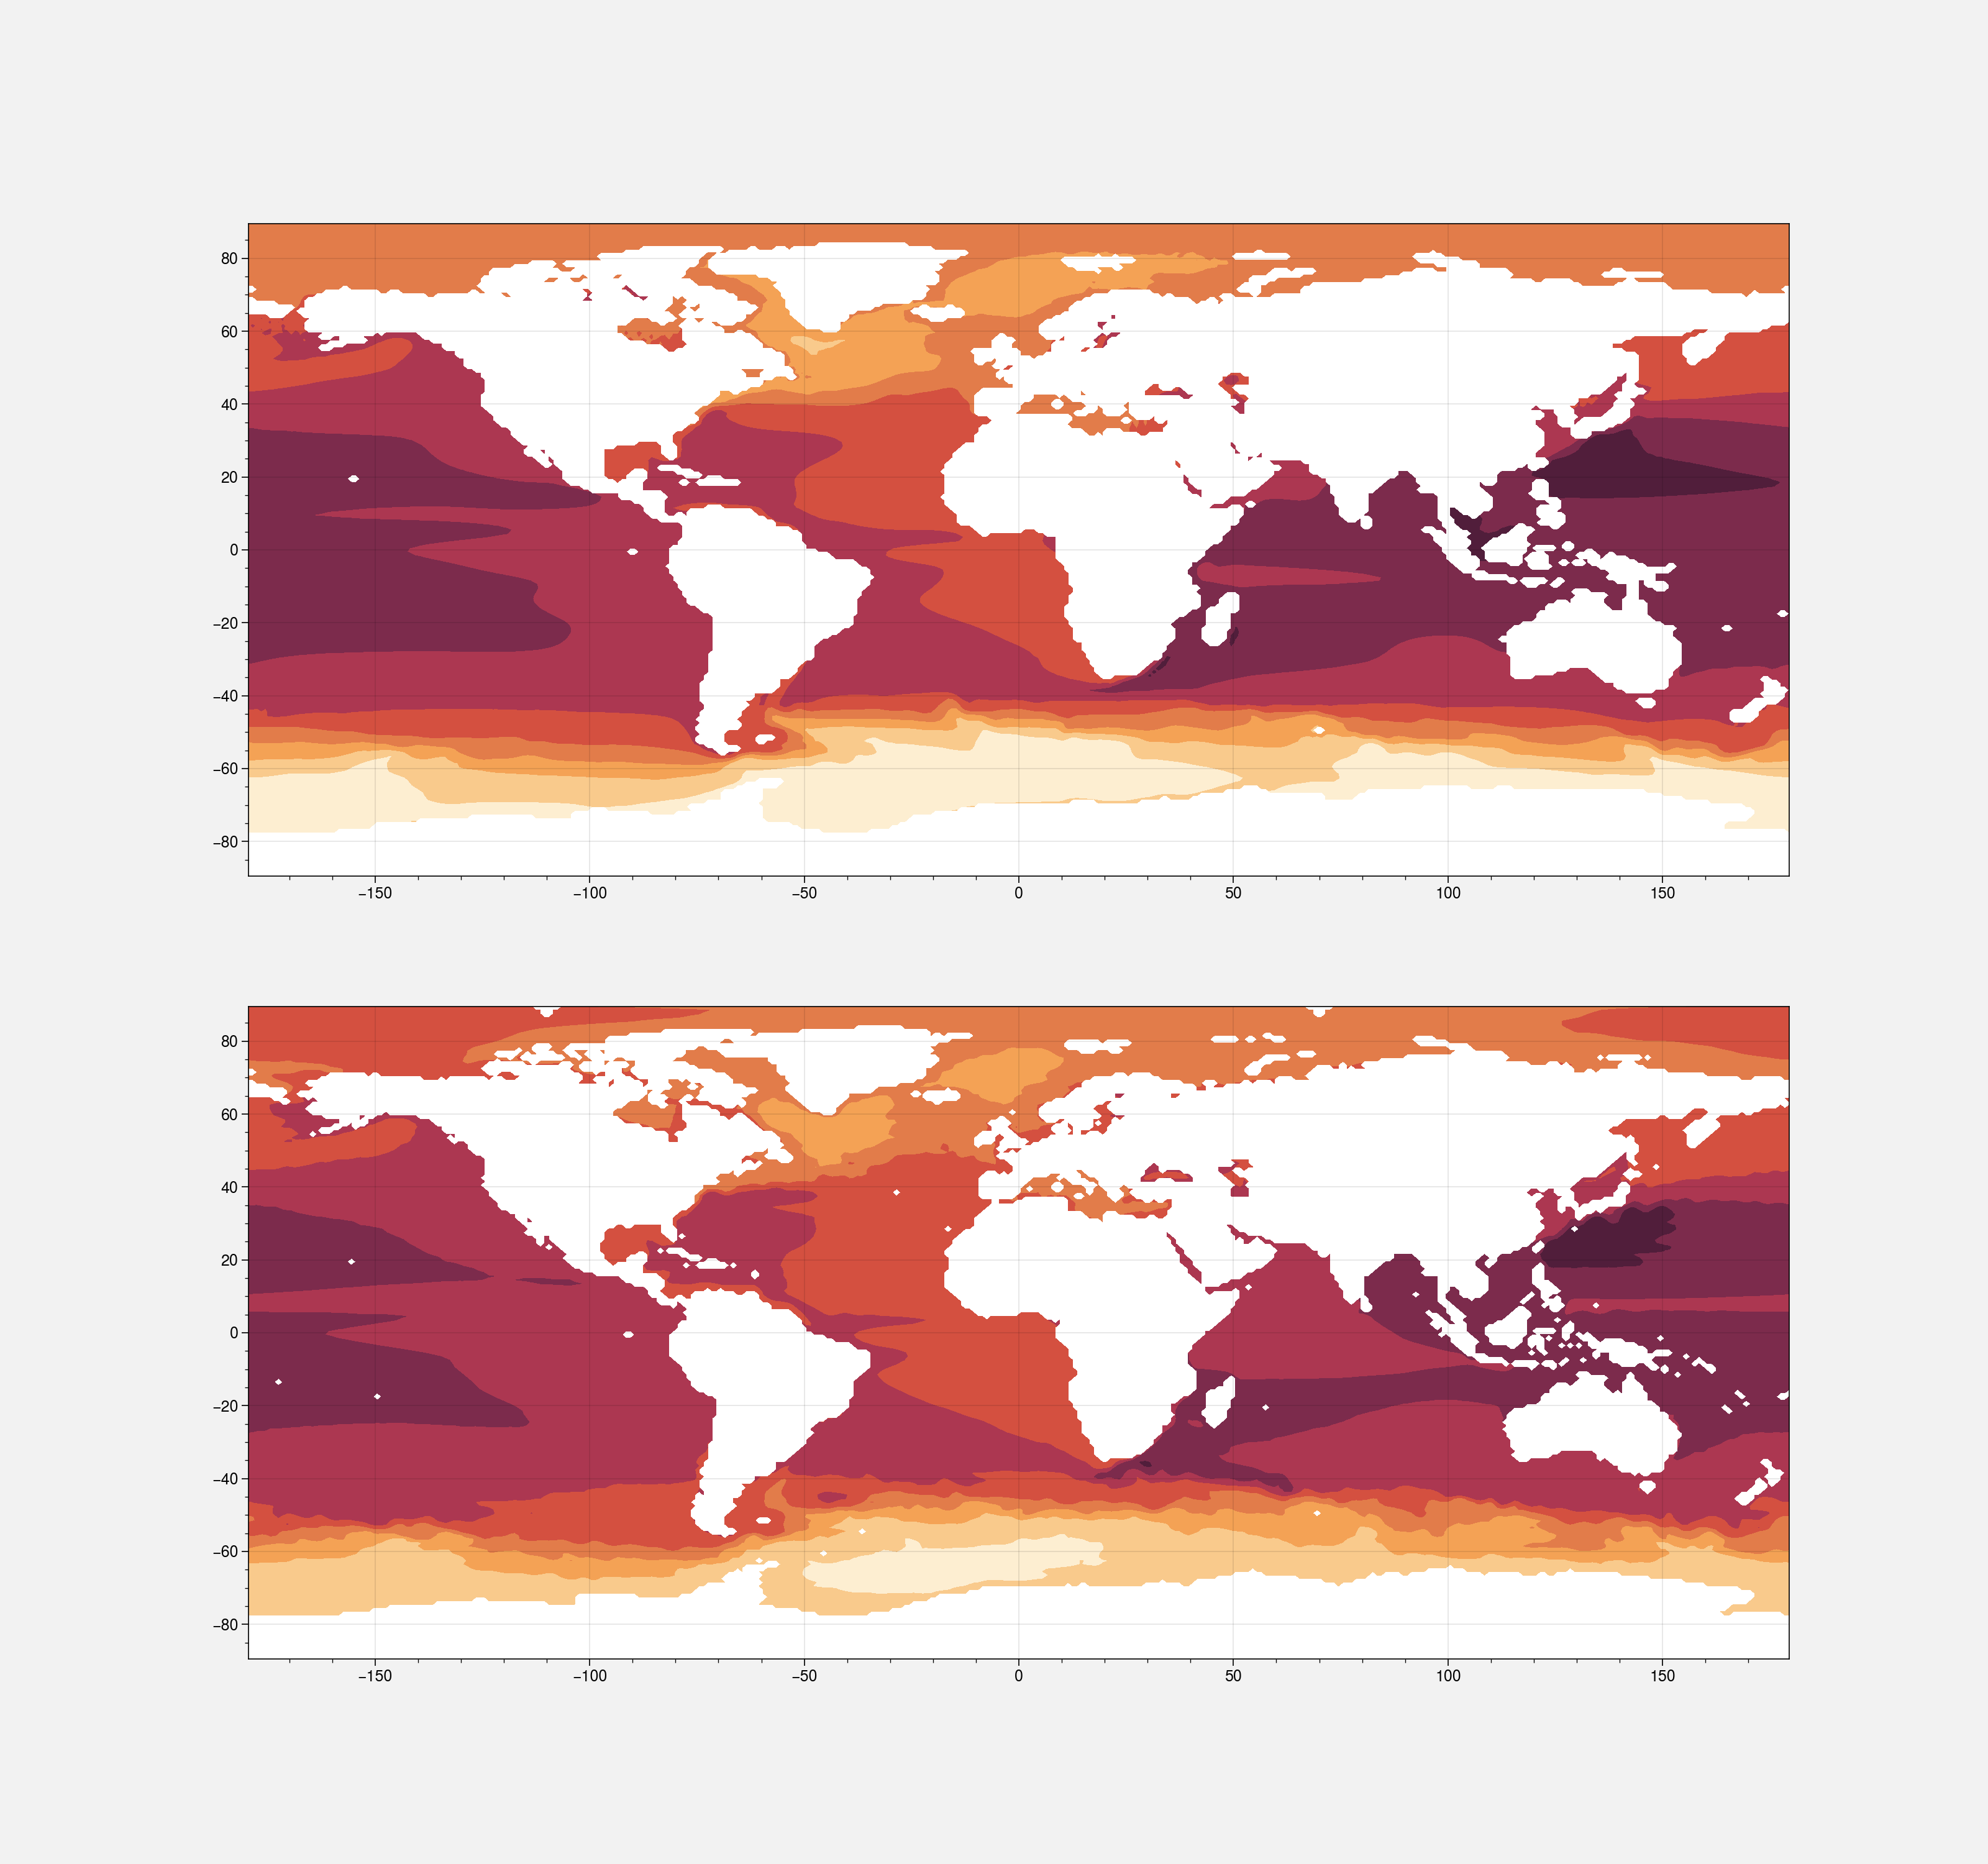

In [20]:
fig, axes = plt.subplots(2,1,figsize=(16,15))
axes[0].contourf(ssh1_rgd_TL.lon,ssh1_rgd_TL.lat,ssh1_rgd_TL)
axes[1].contourf(ssh1_rgd_TH.lon,ssh1_rgd_TH.lat,ssh1_rgd_TH)

# make pics

In [21]:
ssh1_NA_obs = ssh1_obs.sel(lat=slice(lat1, lat2),lon=slice(lon1+360, lon2+360))
ssh1_NA_obs

<xarray.DataArray 'zos' (lat: 45, lon: 90)>
array([[         nan,          nan,  -1.19689426, ...,          nan,
                 nan,          nan],
       [-21.2785143 , -18.02178688, -11.92538661, ...,          nan,
                 nan,          nan],
       [-21.13532845, -18.82436141, -13.91804956, ...,          nan,
                 nan,          nan],
       ...,
       [         nan,          nan,          nan, ..., -72.67907892,
        -72.6032058 , -72.16494173],
       [         nan,          nan,          nan, ..., -81.22307025,
        -80.46578333, -79.46800233],
       [         nan,          nan,          nan, ..., -86.68659432,
        -86.39732484, -85.7644754 ]])
Coordinates:
  * lat      (lat) float64 20.5 21.5 22.5 23.5 24.5 ... 60.5 61.5 62.5 63.5 64.5
  * lon      (lon) float64 270.5 271.5 272.5 273.5 ... 356.5 357.5 358.5 359.5

In [22]:
ssh1_rgd_NA_TL = ssh1_rgd_TL.where((ds_1deg.lat>lat1) & (ds_1deg.lat<lat2) & 
                                   (ds_1deg.lon>-90) & (ds_1deg.lon<0), drop=True)
ssh1_rgd_NA_TH = ssh1_rgd_TH.where((ds_1deg.lat>lat1) & (ds_1deg.lat<lat2) & 
                                   (ds_1deg.lon>-90) &  (ds_1deg.lon<0), drop=True)
ssh1_rgd_NA_TH

<xarray.DataArray 'SSH' (y: 45, x: 90)>
array([[          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [ -28.30467619,           nan,           nan, ...,           nan,
                  nan,           nan],
       [ -20.60669897,  -22.47208153,  -23.63350225, ...,           nan,
                  nan,           nan],
       ...,
       [ -54.03795283,  -54.32660922,  -53.51597332, ...,  -97.37185128,
         -96.24295971,  -93.07111205],
       [ -52.33315397,  -53.17396493,  -52.0170501 , ..., -104.18403858,
        -101.31896752,  -95.83755239],
       [          nan,           nan,  -52.07793637, ..., -103.38966366,
        -101.36646529,  -99.11159003]])
Coordinates:
    lon      (y, x) float64 -89.5 -88.5 -87.5 -86.5 ... -3.5 -2.5 -1.5 -0.5
    lat      (y, x) float64 20.5 20.5 20.5 20.5 20.5 ... 64.5 64.5 64.5 64.5
Dimensions without coordinates: y, x
Attributes:
    regrid_method:  bilinear

/scratch/group/ihesp/shared/conda/envs/envMar25/lib/python3.7/site-packages/proplot/figure.py:1158: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  return super().colorbar(*args, cax=cax, **kwargs)
/scratch/group/ihesp/shared/conda/envs/envMar25/lib/python3.7/site-packages/proplot/figure.py:1158: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  return super().colorbar(*args, cax=cax, **kwargs)
/scratch/group/ihesp/shared/conda/envs/envMar25/lib/python3.7/site-packages/proplot/figure.py:1158: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  return super

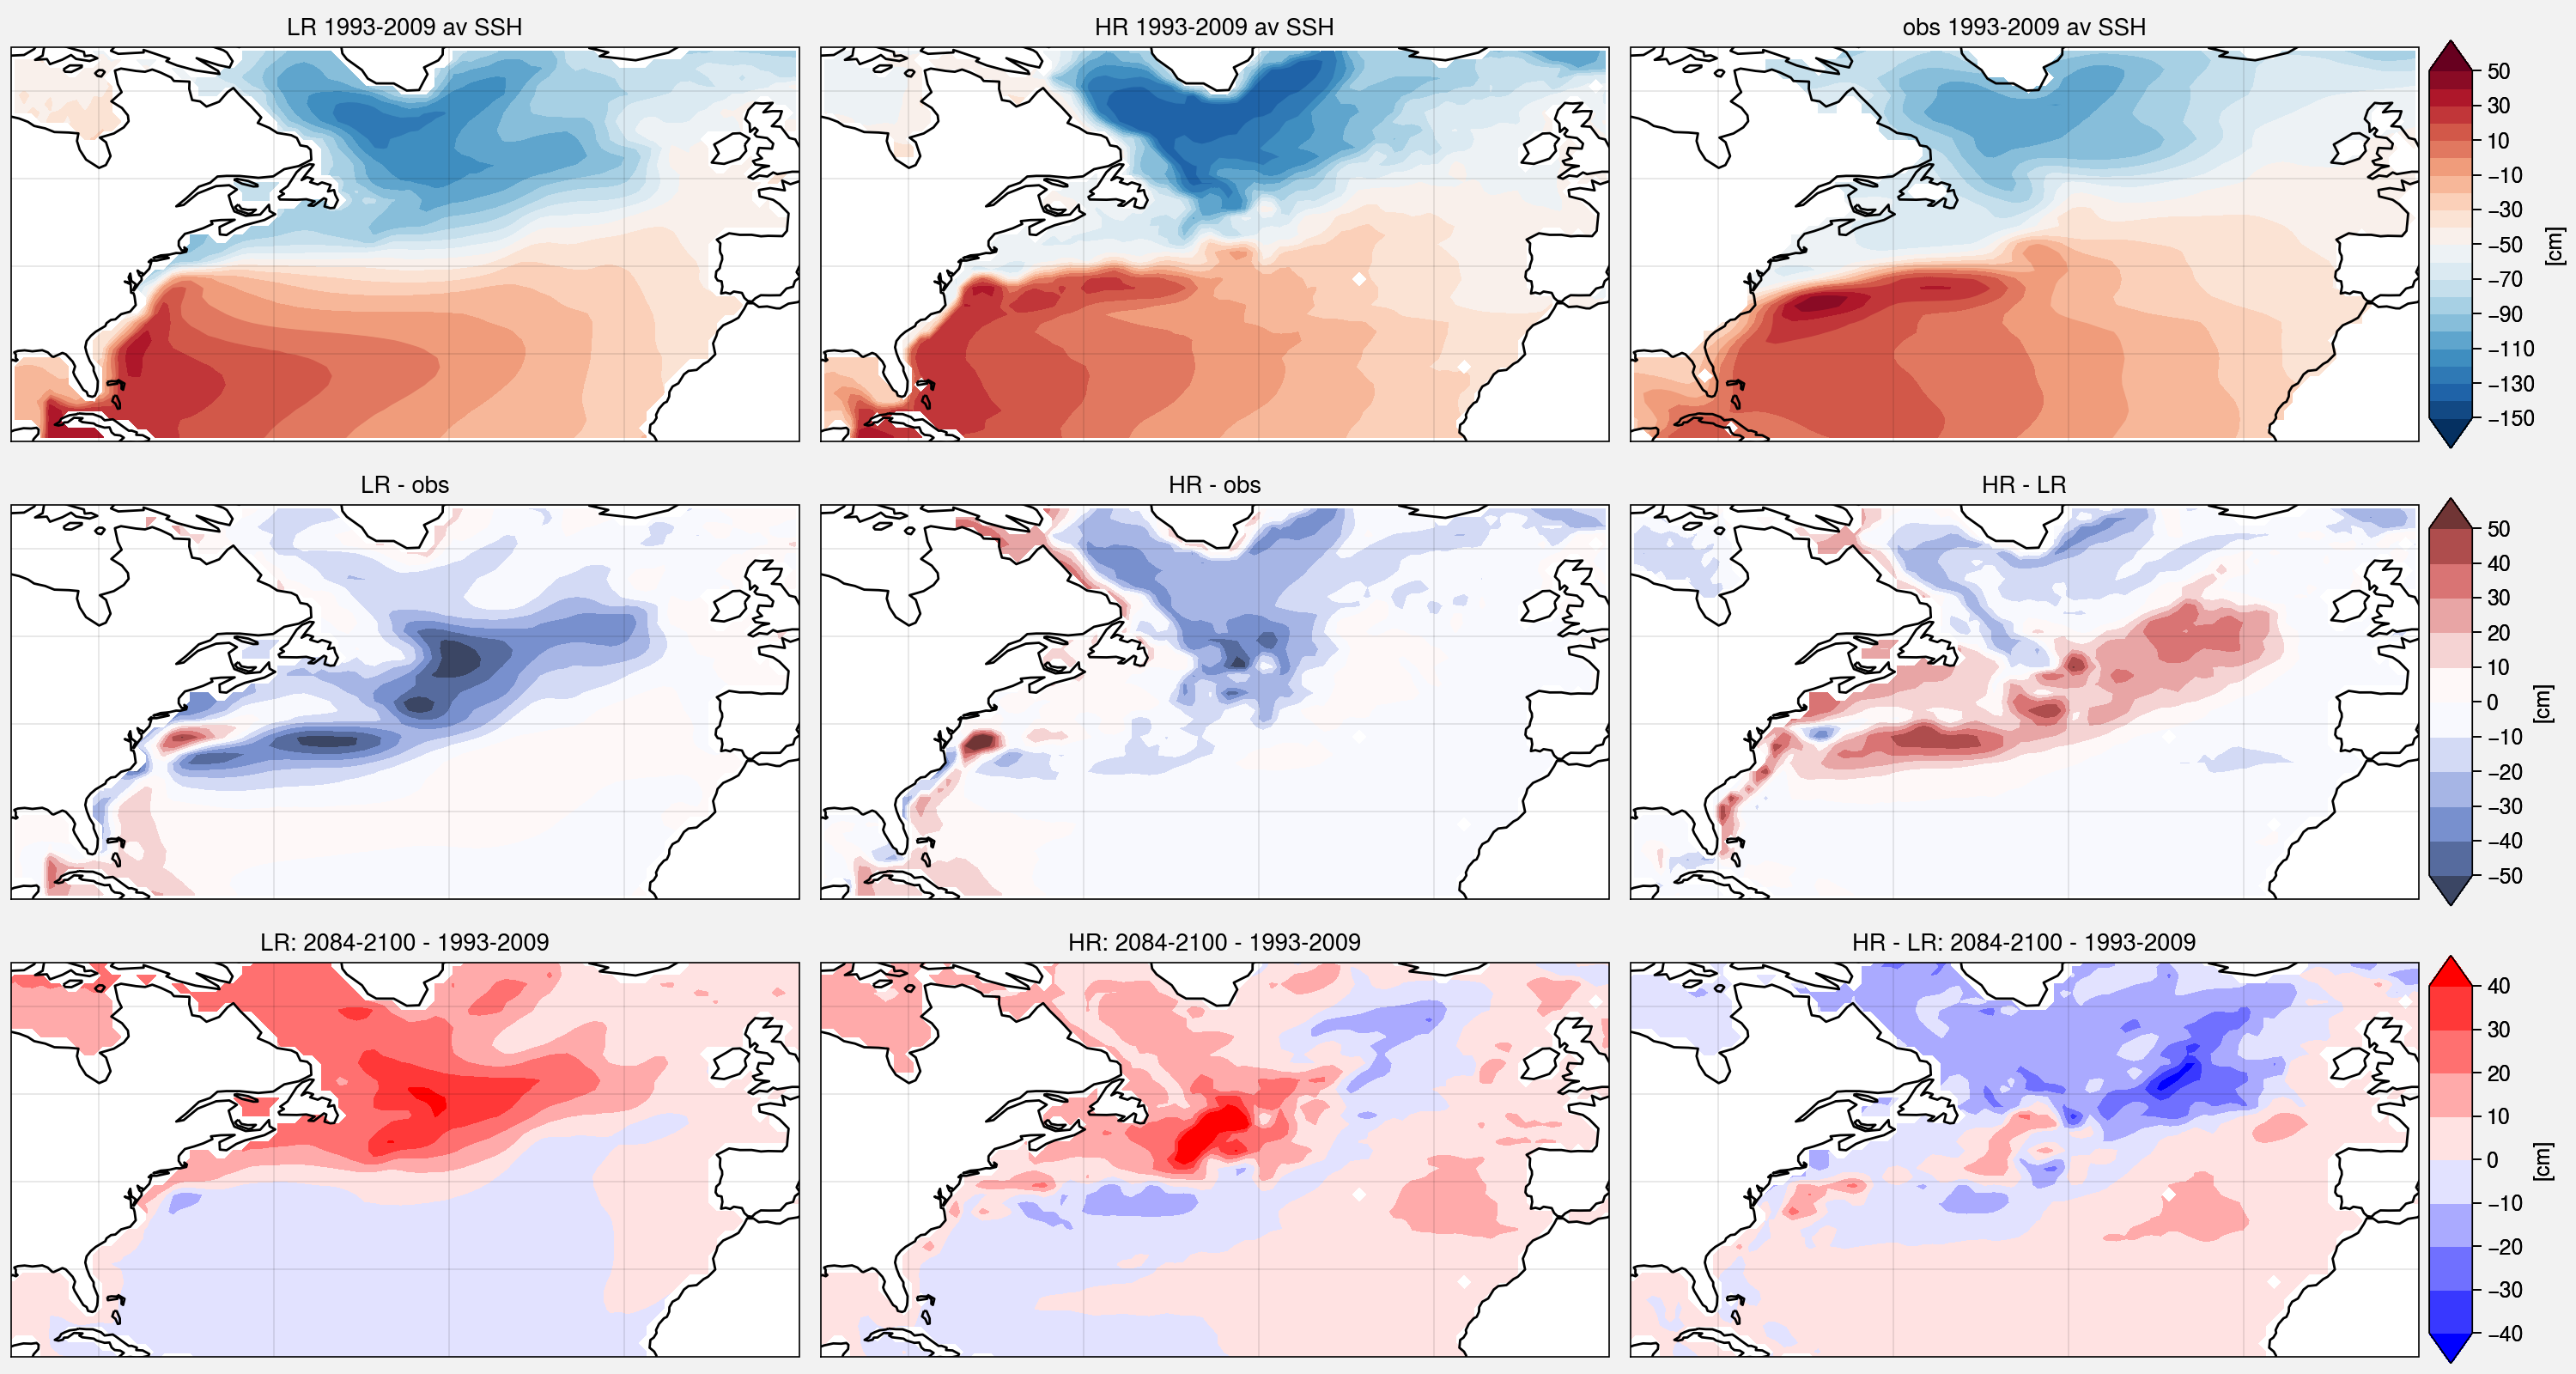

In [23]:
pc = cartopy.crs.PlateCarree()

fig, axs = plot.subplots(ncols=3, nrows=3, proj='cyl', width='15in', height='8in')

# row 1: climatology mean ssh
axs[0,0].contourf(ssh1_rgd_NA_TL.lon, ssh1_rgd_NA_TL.lat, 
        ssh1_rgd_NA_TL, levels=np.arange(-150,50+1,10), transform=pc, 
        vmin=-150, vmax=50, cmap="RdBu_r", extend='both')
axs[0,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,0].set_extent([lon1, lon2, lat1, lat2], crs=pc)
axs[0,0].set_title('LR 1993-2009 av SSH')

axs[0,1].contourf(ssh1_rgd_NA_TH.lon, ssh1_rgd_NA_TH.lat, 
        ssh1_rgd_NA_TH, levels=np.arange(-150,50+1,10), transform=pc, 
        vmin=-150, vmax=50, cmap="RdBu_r", extend='both')
axs[0,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,1].set_extent([lon1, lon2, lat1, lat2], crs=pc)
axs[0,1].set_title('HR 1993-2009 av SSH')

m1=axs[0,2].contourf(ssh1_NA_obs.lon, ssh1_NA_obs.lat, 
        ssh1_NA_obs, levels=np.arange(-150,50+1,10), transform=pc, 
        vmin=-150, vmax=50, cmap="RdBu_r", extend='both')
axs[0,2].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,2].set_extent([lon1, lon2, lat1, lat2], crs=pc)
axs[0,2].set_title('obs 1993-2009 av SSH')

# Now adding the colorbar
cb = axs[0,2].colorbar(m1,loc='r',label='[cm]',extend='both',width='2em',shrink=1)

# row 2: CESM-obs ssh: model bias
axs[1,0].contourf(ssh1_NA_obs.lon, ssh1_NA_obs.lat, (ssh1_rgd_NA_TL.values-ssh1_NA_obs.values), 
        transform=pc, levels=np.arange(-50,50+1,10),vmin=-50,vmax=50, cmap='Div',
            cmap_kw={'cut': -0.04}, extend='both')
axs[1,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[1,0].set_extent([lon1, lon2, lat1, lat2], crs=pc)
axs[1,0].set_title('LR - obs')

axs[1,1].contourf(ssh1_NA_obs.lon, ssh1_NA_obs.lat, (ssh1_rgd_NA_TH.values-ssh1_NA_obs.values), 
            transform=pc, levels=np.arange(-50,50+1,10), vmin=-50, vmax=50, cmap='Div',
            cmap_kw={'cut': -0.04}, extend='both')
axs[1,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[1,1].set_extent([lon1, lon2, lat1, lat2], crs=pc)
axs[1,1].set_title('HR - obs')

m2=axs[1,2].contourf(ssh1_rgd_NA_TH.lon, ssh1_rgd_NA_TH.lat, (ssh1_rgd_NA_TH-ssh1_rgd_NA_TL), 
        transform=pc, levels=np.arange(-50,50+1,10),vmin=-50,vmax=50, cmap='Div',
        cmap_kw={'cut': -0.04}, extend='both')
axs[1,2].coastlines(resolution='110m', color='black', linewidth=1)
axs[1,2].set_extent([lon1, lon2, lat1, lat2], crs=pc)
axs[1,2].set_title('HR - LR')
# Now adding the colorbar
cb = axs[1,2].colorbar(m2,loc='r',label='[cm]',extend='both',width='2em',shrink=1)

# row 3: CESM ssh: future - historic
axs[2,0].contourf(ssh_df_rgd_TL.lon, ssh_df_rgd_TL.lat, ssh_df_rgd_TL,
        transform=pc, levels=np.arange(-40,40+1,10),vmin=-40,vmax=40, cmap='bwr', extend='both')
axs[2,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[2,0].set_extent([lon1, lon2, lat1, lat2], crs=pc)
axs[2,0].set_title('LR: 2084-2100 - 1993-2009')

axs[2,1].contourf(ssh_df_rgd_TH.lon, ssh_df_rgd_TH.lat, ssh_df_rgd_TH, 
            transform=pc, levels=np.arange(-40,40+1,10), vmin=-40, vmax=40, cmap='bwr', extend='both')
axs[2,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[2,1].set_extent([lon1, lon2, lat1, lat2], crs=pc)
axs[2,1].set_title('HR: 2084-2100 - 1993-2009')

m3=axs[2,2].contourf(ssh_df_rgd_TL.lon, ssh_df_rgd_TL.lat, (ssh_df_rgd_TH-ssh_df_rgd_TL), 
        transform=pc, levels=np.arange(-40,40+1,10),vmin=-40,vmax=40, cmap='bwr', extend='both')
axs[2,2].coastlines(resolution='110m', color='black', linewidth=1)
axs[2,2].set_extent([lon1, lon2, lat1, lat2], crs=pc)
axs[2,2].set_title('HR - LR: 2084-2100 - 1993-2009')
# Now adding the colorbar
cb = axs[2,2].colorbar(m3,loc='r',label='[cm]',extend='both',width='2em',shrink=1)

In [24]:
# compute statistics 
print(np.nanmean(abs((ssh1_rgd_NA_TL.values-ssh1_NA_obs.values))))
# np.nanmean((ssh1_rgd_NA_TL.values-ssh1_NA_obs.values)**2)

print(np.nanmean(abs((ssh1_rgd_NA_TH.values-ssh1_NA_obs.values))))
# np.nanmean((ssh1_rgd_NA_TH.values-ssh1_NA_obs.values)**2)

(10.9-9.6)/10.9
# (271-188)/271

10.93601746568785
9.569476978198427


0.11926605504587162

# Appendix 
you should compare observation with transient runs not transient minus control

In [ ]:
infile1_CH = ('/scratch/group/ihesp/archive/Sunway_Runs/HR_PI_CTRL/'
             'B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.SSH.0021.0501.nc')
ds_CH_raw = xr.open_dataset(infile1_CH)
ds_CH_raw

In [ ]:
ds_CH = ds_CH_raw.assign_coords(time=ds_CH_raw.time.to_pandas().index.shift(1601,'Y')) # s: shift time
ds_CH